# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [97]:
# Dependencies and Setup
import os
import pandas as pd
from pathlib import Path
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import requests
import time

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy library to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [52]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [53]:
# Set the API base URL
url ="http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | east london
Processing Record 2 of Set 1 | pindushi
Processing Record 3 of Set 1 | port mathurin
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | nantucket
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | bealanana
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | makamba
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | carmelo
Processing Record 14 of Set 1 | west island
Processing Record 15 of Set 1 | guiuan
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | pesqueira
Processing Record 20 of Set 1 | uturoa
Processing Record 21 of Set 1 | fale old settlement
Processing Record 22 of Set 1 | margaret river
Pro

In [54]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [55]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,east london,-33.0153,27.9116,16.70,69,75,7.80,ZA,1685833406
1,pindushi,62.9152,34.5800,3.98,74,91,0.87,RU,1685833407
2,port mathurin,-19.6833,63.4167,24.88,76,13,10.33,MU,1685833278
3,grytviken,-54.2811,-36.5092,0.44,89,13,3.26,GS,1685833407
4,port-aux-francais,-49.3500,70.2167,7.54,92,99,14.00,TF,1685833407


In [56]:
# Export the City_Data into a csv
output_path = os.path.join("..", "output_data", "cities.csv")
city_data_df.to_csv(output_path, index_label="City_ID")

In [57]:
# Read saved data
city_data_df = pd.read_csv(output_path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,16.70,69,75,7.80,ZA,1685833406
1,pindushi,62.9152,34.5800,3.98,74,91,0.87,RU,1685833407
2,port mathurin,-19.6833,63.4167,24.88,76,13,10.33,MU,1685833278
3,grytviken,-54.2811,-36.5092,0.44,89,13,3.26,GS,1685833407
4,port-aux-francais,-49.3500,70.2167,7.54,92,99,14.00,TF,1685833407


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

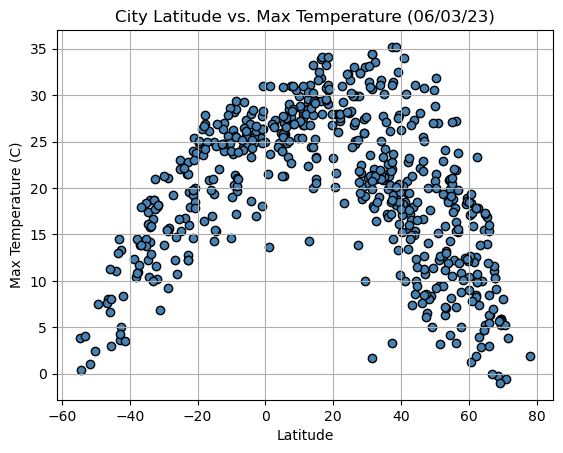

In [58]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig = os.path.join("..", "output_data","Fig1.png")
plt.savefig(output_fig)

# Show plot
plt.show()

#### Latitude Vs. Humidity

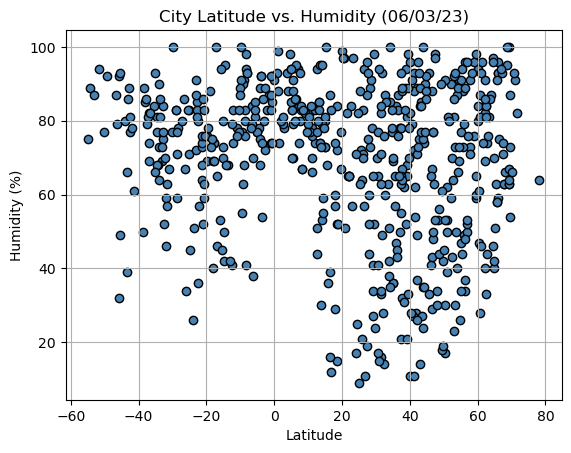

In [59]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig2 = os.path.join("..", "output_data","Fig2.png")
plt.savefig(output_fig2)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

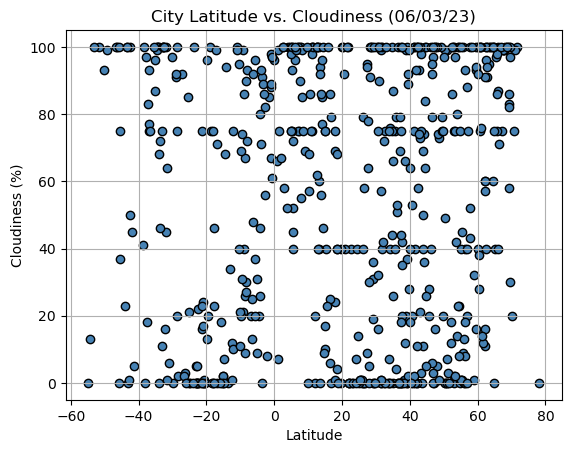

In [60]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig3 = os.path.join("..", "output_data","Fig3.png")
plt.savefig(output_fig3)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

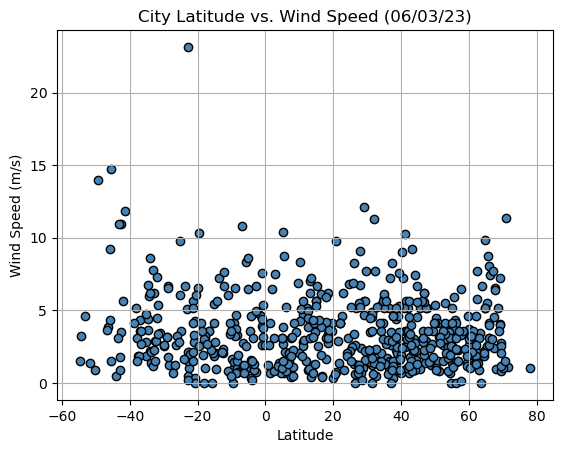

In [61]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
output_fig4 = os.path.join("..", "output_data","Fig4.png")
plt.savefig(output_fig4)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [98]:
# Define a function to create Linear Regression plots:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
        
        # Run regression on hemisphere weather data
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        
        # Calculate the regression line "y values" from the slope and intercept
        regress_values = x_values * slope + intercept
        
        # Get the equation of the line
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        # Create a scatter plot and plot the regression line
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        
        # Annotate the text for the line equation
        plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
        
        # Set title
        plt.title(title)
        
        # Label x axis
        plt.xlabel('Latitude')

        #plt.ylabel(y_values.name)
        
        # Print r square value
        print(f"The r-squared is: {rvalue**2}")
        
        # Show plot
        #plt.show()

In [82]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pindushi,62.9152,34.5800,3.98,74,91,0.87,RU,1685833407
5,ribeira grande,38.5167,-28.7000,18.21,89,12,2.24,PT,1685833407
6,nantucket,41.2835,-70.0995,10.03,93,100,10.29,US,1685833122
7,longyearbyen,78.2186,15.6401,1.91,64,0,1.03,SJ,1685833303
9,bethel,41.3712,-73.4140,17.42,72,100,5.66,US,1685833132


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,east london,-33.0153,27.9116,16.70,69,75,7.80,ZA,1685833406
2,port mathurin,-19.6833,63.4167,24.88,76,13,10.33,MU,1685833278
3,grytviken,-54.2811,-36.5092,0.44,89,13,3.26,GS,1685833407
4,port-aux-francais,-49.3500,70.2167,7.54,92,99,14.00,TF,1685833407
8,bealanana,-14.5500,48.7333,15.39,95,68,2.05,MG,1685833408


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5062377140254887


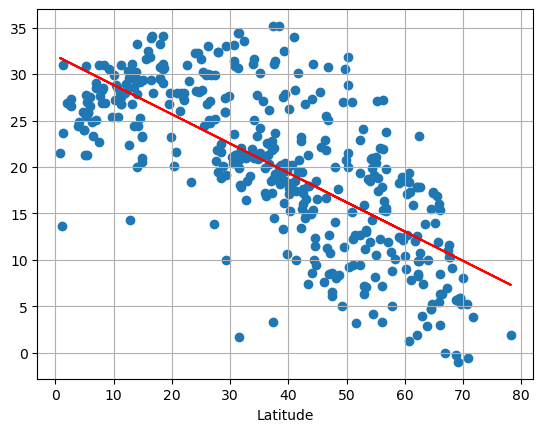

In [100]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, '', (10,40))
#add y label 
#plt.ylabel(y_values.name)
plt.grid(True)

plt.show()


The r-squared is: 0.7012699566824496


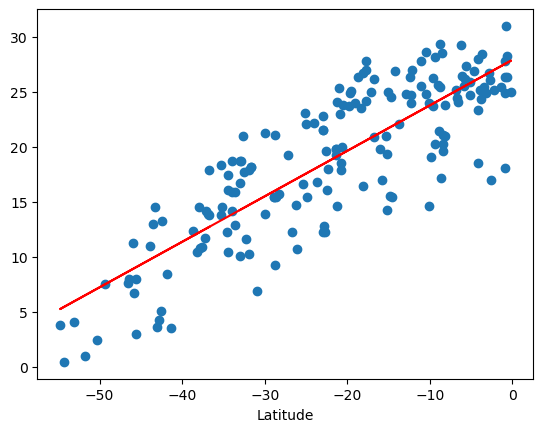

In [101]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, '', (-50,90))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


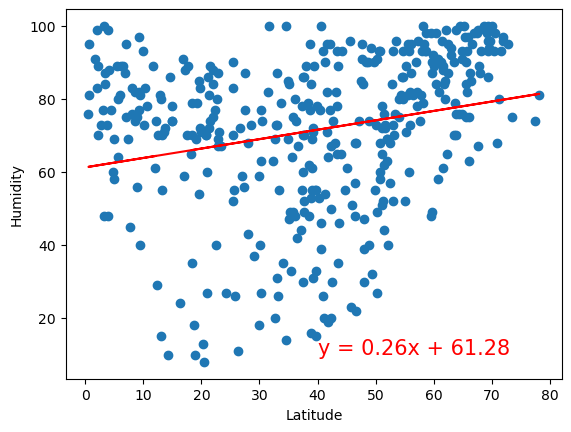

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, '', (40,10)) 


The r-squared is: 0.004491338340459414


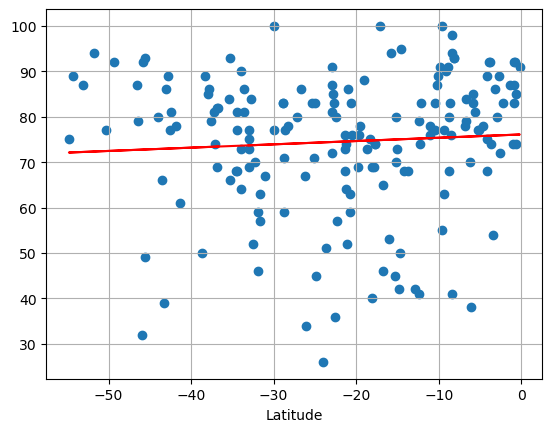

In [102]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, '', (-50,15))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


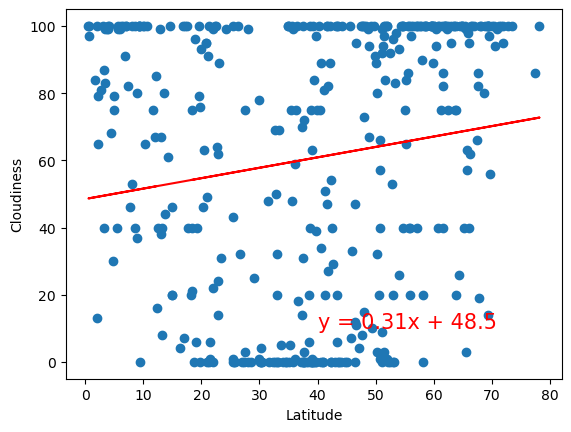

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, '', (40,10))


The r-value is: 0.02056735429994368


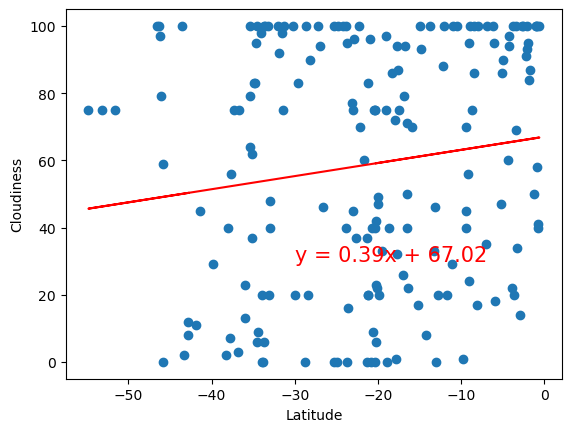

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, '', (-50,60))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


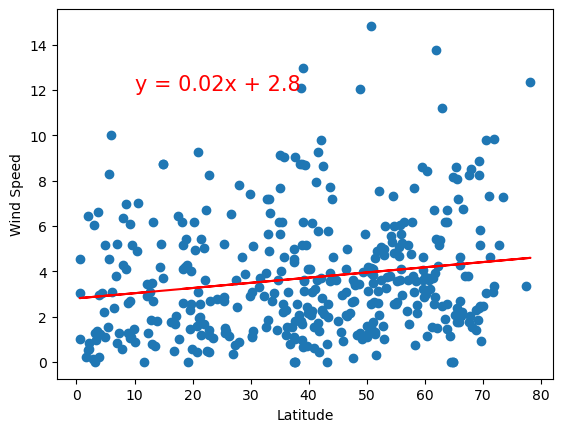

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, '', (40,35))

The r-value is: 0.062239040700515696


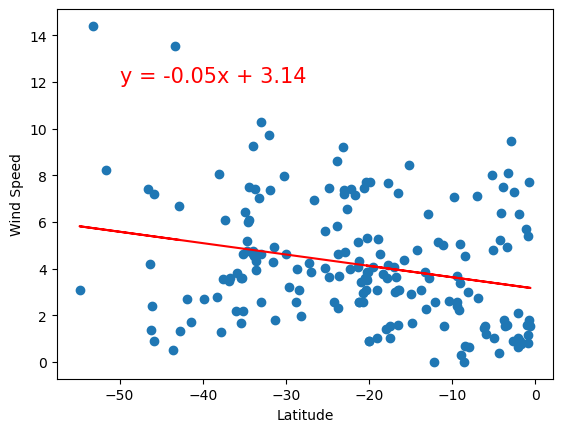

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, '', (-50,35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE